In [185]:
# Making the necessary imports
import pandas as pd

In [186]:
# Loading and displaying the first 10 rows from the dataset to get a good understanding of our data
url = "https://raw.githubusercontent.com/jkirabo/Univariate-and-Bivariate-Exploratory-Data-Analysis-EDA-with-the-Titanic-Dataset/main/titanic.csv"
df = pd.read_csv(url, low_memory=False)
display(df.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [187]:
# Identifying the name and type for each variable in the dataset.
variables = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
types = ["Categorical","Categorical","Categorical","Continuous","Categorical","Categorical","Continuous","Categorical"]

df_variable_types = pd.DataFrame({"Variable": variables, "Type": types})
display(df_variable_types)


,Variable,Type
0,Survived,Categorical
1,Pclass,Categorical
2,Sex,Categorical
3,Age,Continuous
4,SibSp,Categorical
5,Parch,Categorical
6,Fare,Continuous
7,Embarked,Categorical


I ignored some values like PassengerId, Name, Ticket, because they did not fall in the categories of Categorical or continunous.

The dataset shows us 891 passanger records across 12 variables. Some are continuous, and others are categorical, with some not falling in the criteria of any of the two.

**Part 2: Univariate Analysis**

Starting out with continuous Variables

In [188]:
#Summary of Statistics for Contibuous Variables

continuous_variables = df[["Age","Fare"]].apply(pd.to_numeric, errors="coerce")

# Renamed the columns to look nicer in the table
summary_of_statistics_continuous = continuous_variables.describe().T.rename(columns={
    "count":"Count",
    "mean":"Mean",
    "std":"Standard Deviation",
    "min":"Min",
    "50%":"Median",
    "max":"Max"
})

# Adding extra columns that describe() does not give us.
summary_of_statistics_continuous["Missing Count"]   = continuous_variables.isna().sum()
summary_of_statistics_continuous["Missing Percent"] = continuous_variables.isna().mean() * 100
summary_of_statistics_continuous["Variance"]        = continuous_variables.var()
summary_of_statistics_continuous["Skewness"]        = continuous_variables.apply(lambda s: skew(s.dropna()))
summary_of_statistics_continuous["Kurtosis"]        = continuous_variables.apply(lambda s: kurtosis(s.dropna()))

display(summary_of_statistics_continuous)

,Count,Mean,Standard Deviation,Min,25%,Median,75%,Max,Missing Count,Missing Percent,Variance,Skewness,Kurtosis
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,177,19.86532,211.019125,0.388290,0.168637
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,0,0.00000,2469.436846,4.779253,33.204289


AgeBucket
20-29      220
Missing    177
30-39      167
10-19      102
40-49       89
0-9         62
50-59       48
60-69       19
70-79        6
80-89        1
Name: count, dtype: int64


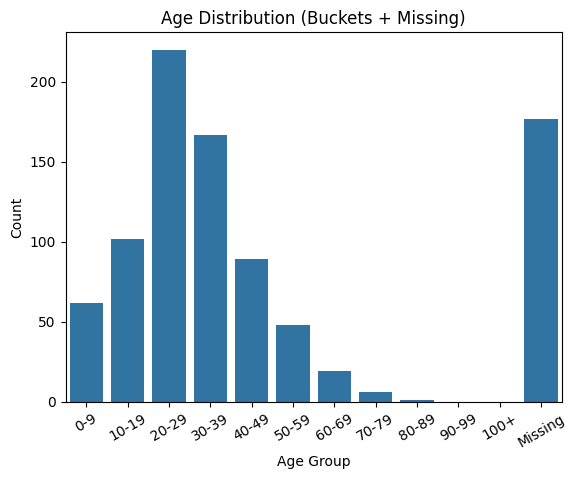

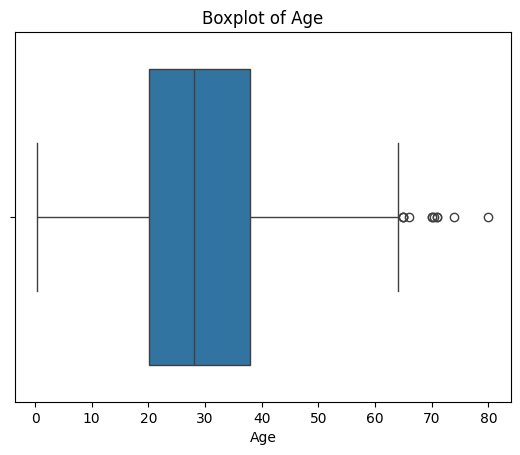

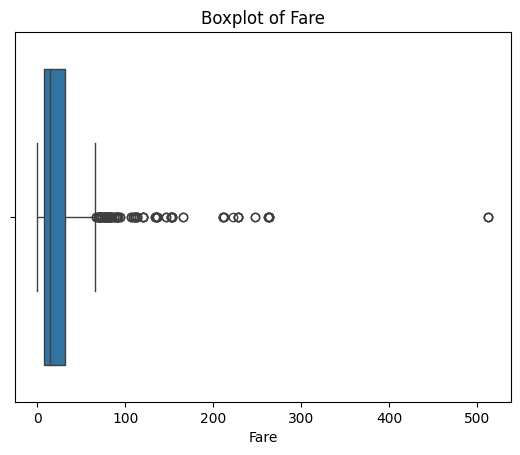

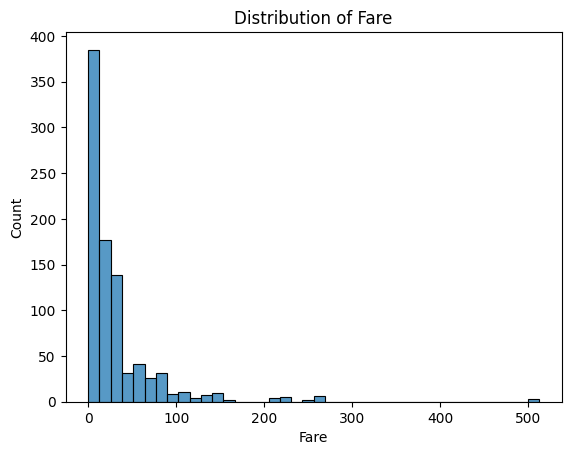

In [189]:
# Vizualizing Continuous Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Count Plot for Age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float("inf")]
labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99","100+"]

df["AgeBucket"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["AgeBucket"] = df["AgeBucket"].astype(str).replace("nan", "Missing")

print(df["AgeBucket"].value_counts())

sns.countplot(x="AgeBucket", data=df, order=labels+["Missing"])
plt.title("Age Distribution (Buckets + Missing)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

print()

# Box plot for age
sns.boxplot(x=df["Age"].dropna())
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

# Adding a space between the two plots
print("\n\n")

# Boxplot for Fare
sns.boxplot(x=df["Fare"].dropna())
plt.title("Boxplot of Fare")
plt.show()

print()

# Histogram for age
sns.histplot(df["Fare"].dropna(), bins=40, kde=False)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

* At first, I used a histogram (sns.histplot) to show the distribution of Age. However, because Age has about 19% missing values, those were being treated like 0s, and this was a bit misleadng. I wanted to highlight the fact that not everyone onboard had their age recorded. Since countplot does not create bins automatically, I had to manually bucket the ages with pd.cut. This way, I could use a count plot that includes both the age groups and a “Missing” category. Histograms in Seaborn can’t display string labels like “Missing,” so this adjustment gave me a clearer view of the data.
* The Box Plot I used for age ignores the missing values, as the count plot accurately represents them

From this data, we can make a few observations:
* The distribution of Age is close to bell-shaped, peaking in the 20–29 range. The mean (29.7) and median (28.0) are close together, which indicates that the data is fairly symmetric. The calculated skewness of 0.39 supports this, as values near zero suggest little asymmetry. The spread is moderate, with most passengers between 20 and 40 years old. The boxplot shows that Age is compact, without extreme outliers. However, about 20% of the Age values are missing, which is a significant data quality issue that will need to be addressed before modeling.
* The distribution of Fare is heavily right-skewed. Most fares fall below 50, with the majority clustered near zero, but a few passengers paid extremely high fares, with one as high as 512. This creates a long tail that skews the data. The mean (32.2) is much higher than the median (14.5), which confirms the influence of these outliers. The standard deviation (49.7) and variance (2469) are much larger than those of Age, showing that Fare has far greater spread. The boxplot highlights many outliers, and the skewness value of 4.78 reflects the strong right tail. Unlike Age, there are no missing values in Fare, but they both show presence of outliers.


Performing a univariate analysis with categorical Variables

,Variable,Unique Values
0,Survived,2
1,Pclass,3
2,Sex,2
3,SibSp,7
4,Parch,7
5,Embarked,4


/tmp/ipython-input-1527631706.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Variable", y="Unique Values", data=categorical_variables, palette="pastel")


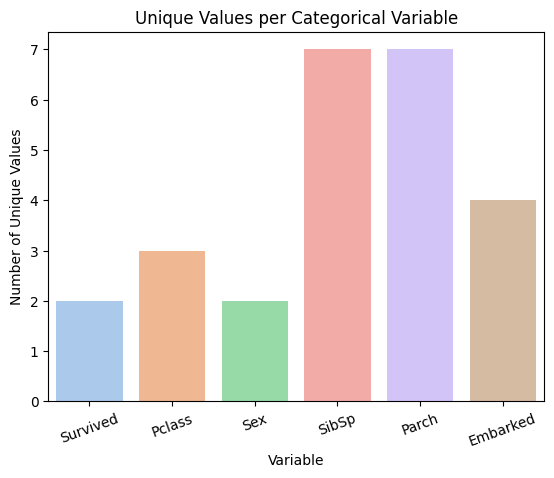

,count
Survived,
0,549
1,342


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


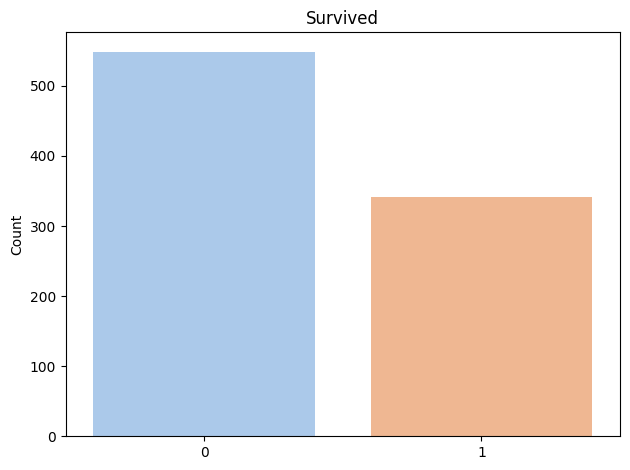

,count
Pclass,
3,491
1,216
2,184


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


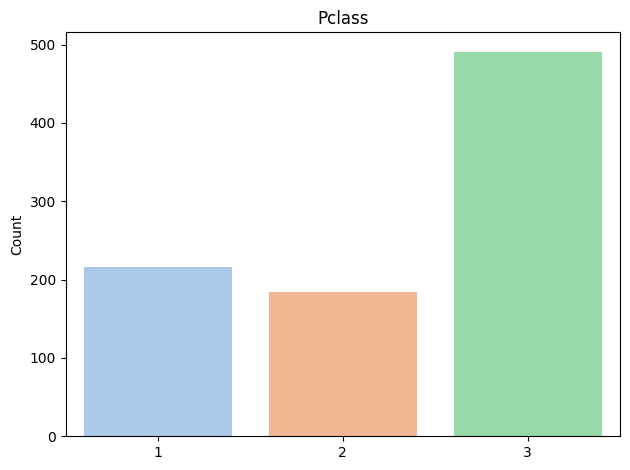

,count
Sex,
male,577
female,314


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


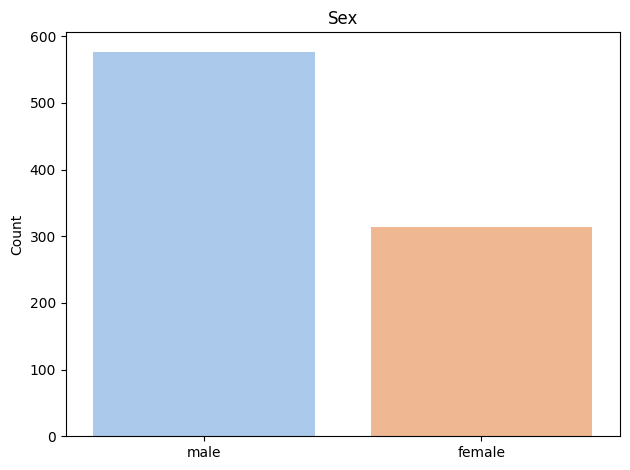

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


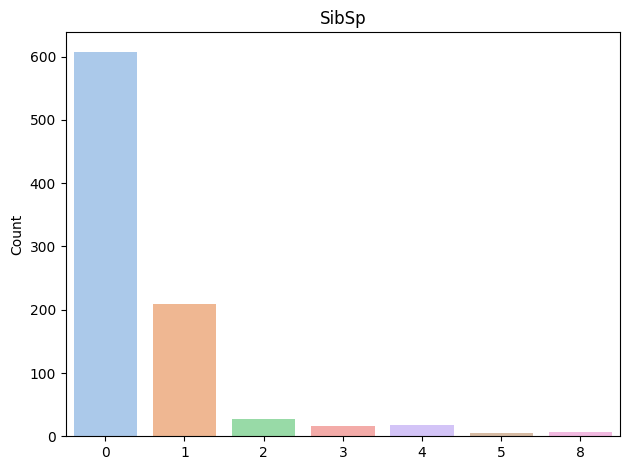

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


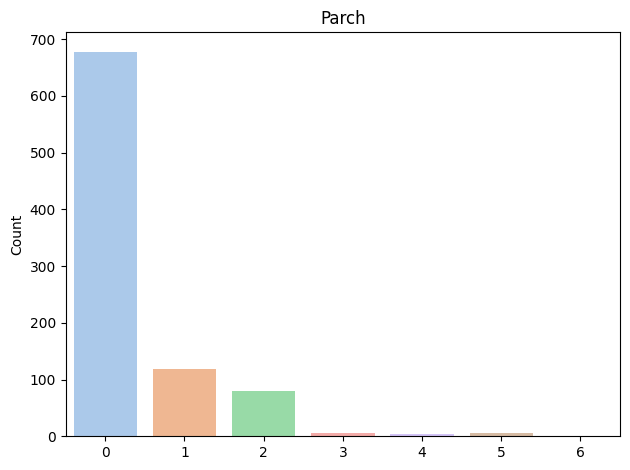

,count
Embarked,
S,644
C,168
Q,77
NaN,2


/tmp/ipython-input-1527631706.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


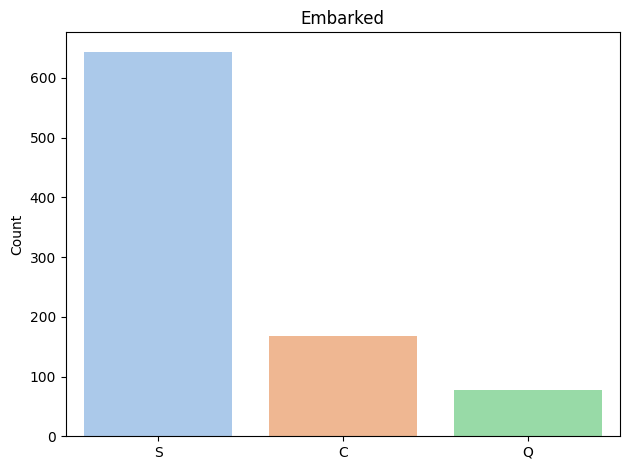

In [190]:
# Calculating the frequency outputs of unique values
categorical_variables = df[df_variable_types.loc[df_variable_types["Type"].str.lower() == "categorical", "Variable"].tolist()].nunique(dropna=False).reset_index()

# Establishing frequencey of each categorical value
categorical_variables = (
    df[df_variable_types.loc[df_variable_types["Type"].str.lower() == "categorical", "Variable"].tolist()]
    .nunique(dropna=False)
    .reset_index()
    .rename(columns={"index": "Variable", 0: "Unique Values"})
)

display(categorical_variables)

ax = sns.barplot(x="Variable", y="Unique Values", data=categorical_variables, palette="pastel")
ax.set_title("Unique Values per Categorical Variable")
ax.set_xlabel("Variable")
ax.set_ylabel("Number of Unique Values")
plt.xticks(rotation=20)
plt.show()

# Helper plotting function
def plot_cat(col, title=None):
    # table
    display(df[col].value_counts(dropna=False))

    # plot
    ax = sns.countplot(x=col, data=df, palette="pastel")
    ax.set_title(title or col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()

# Plotting the values
plot_cat("Survived")
plot_cat("Pclass")
plot_cat("Sex")
plot_cat("SibSp")
plot_cat("Parch")
plot_cat("Embarked")


* Survived: Most passengers did not survive. The “did not survive” category is much larger than “survived,”. This tells us that a clear majority of people lost their lives. This tells us the event had a severe human impact, with survival being the exception rather than the norm.

* Pclass: Third class has the highest number of passengers, followed by second class, then first class. The dataset is weighted toward lower ticket classes. The data suggests that third class was the most accessible option, either in terms of price or availability, while first class was the least common.

* Sex: There are more male passengers than female passengers. This highlights a gender imbalance, and raises a number of questions. Either travelling was less appealing to ladies, or some of them were not even allowed to travel solo, or some other metric which we will find out as we continue.

* SibSp: The majority of passengers traveled without siblings or spouses. Only a smaller portion had one or two, and very few had larger family groups in this category.
* Parch: The same trend appears here: most passengers had no parents or children with them, some had one, and only a handful had more.I think this can also be seen in the age histogram where majority of the travellers were in their 20s
* Embarked: Most passengers embarked at Southampton, with fewer from Cherbourg and Queenstown. There are also a small number of missing entries in this column. But this suggests that one station was more popular than other stations. Maybe it was cheaper? Maybe higher population in tht area? We will find out.
* Some features like Survived, Pclass, Sex show dominant categories

> Performing Bivariate Analysis

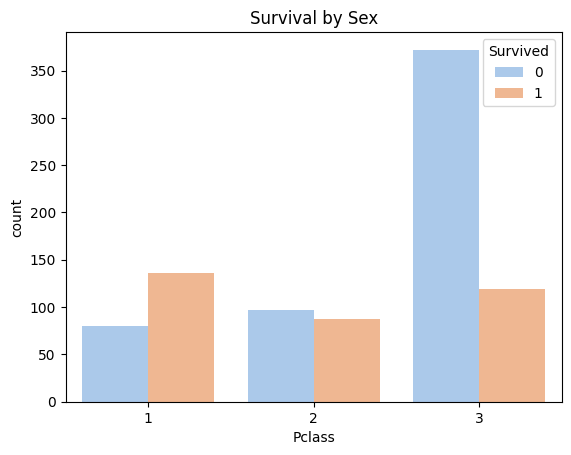

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [191]:
# Pclass vs Survived
sns.countplot(x="Pclass", hue="Survived", data=df, palette="pastel")
plt.title("Survival by Sex")
plt.show()

pd.pivot_table(
    df,
    index="Pclass",
    columns="Survived",
    values="PassengerId",
    aggfunc="count"
)


From this countplot, we can see that the survival outcomes differed strongly by class. The highest number of people aboard were third class passengers, who also had the lowest rate of survival. What I find interesting is how close their number of survival is to the number of people in first class. I think this is because their numbers were so big.First class passengers on the other hand had the best survival odds. Although there were fewer first class passengers overall, a large share of them survived compared to those who did not. Second class passengers fall in between, with survival rates close to 50/50. From this, we can conclude that socioeconomic status played a role in access on survival outcomes aboard the Titanic.


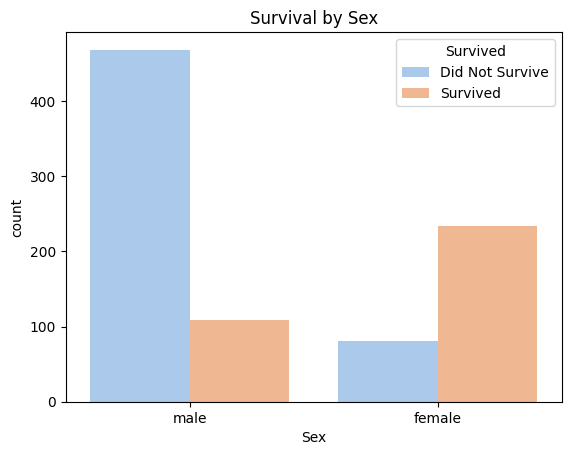

Survived,Did Not Survive,Survived
Sex,,
female,81,233
male,468,109


In [192]:
# Sex vs Survival Rate
df["Survived"] = df["Survived"].replace({0: "Did Not Survive", 1: "Survived"})
sns.countplot(x="Sex", hue="Survived", data=df, palette="pastel")
plt.title("Survival by Sex")
plt.show()

print()

# Descriptive Statistics
pd.crosstab(df["Sex"], df["Survived"])

This visualization shows us that more men did not survive than females survived and vice versa. It is interesting because there were more male passengers than female passengers overall. This pattern stands out because, unlike the comparison between first and third class where the absolute numbers of survivors were closer. Here, we see very large absolute and relative differences. From this we can conclude that gender was also a big factor when it came to survival rates.

/tmp/ipython-input-1096084286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Pclass", y="Fare", data=df, inner="quartile", cut=0, scale="width", palette="pastel")
/tmp/ipython-input-1096084286.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x="Pclass", y="Fare", data=df, inner="quartile", cut=0, scale="width", palette="pastel")


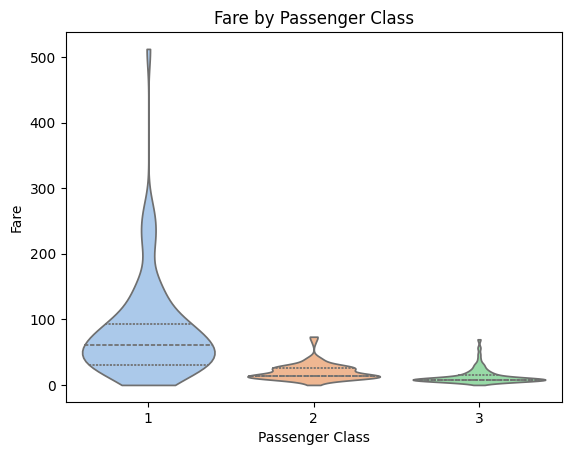

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [193]:
# Fare vs Pclass
ax = sns.violinplot(x="Pclass", y="Fare", data=df, inner="quartile", cut=0, scale="width", palette="pastel")
ax.set_title("Fare by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Fare")
plt.show()

print()

# Descriptive Statistics
df.groupby("Pclass")["Fare"].describe()

From this, we can see that higher class passengers generally paid higher fares, with first class being the most expensive and third class the cheapest. The pattern also shows that fares within first class have a wider spread, while third class fares are more tightly clustered. But this distribution is heavily influenced by one very large outlier, which throws the average off, by making it appear larger than it should be.

/tmp/ipython-input-1882515913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fare", y="Embarked", data=df, palette="pastel")


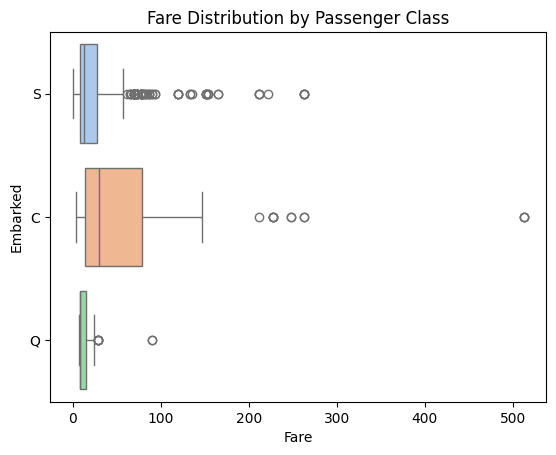

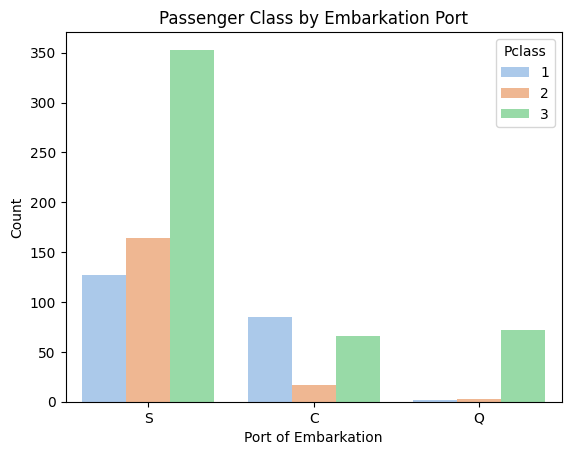

,mean,median,count
Embarked,,,
C,59.954144,29.70,168
Q,13.276030,7.75,77
S,27.079812,13.00,644


In [194]:
# Fare vs Embarked
sns.boxplot(x="Fare", y="Embarked", data=df, palette="pastel")

plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Fare")
plt.ylabel("Embarked")
plt.show()


# Passenger Class by Embarkation Port
sns.countplot(x="Embarked", hue="Pclass", data=df, palette="pastel")
plt.title("Passenger Class by Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

# Descriptive Statistics
df.groupby("Embarked")["Fare"].agg(["mean", "median", "count"])


From this, we can see that Southampton had the largest number of passengers, making it the main port where most people boarded. The fares from Southampton appear more stable, with many passengers in third class but also representation in first and second class. When I compared class by port, it became clear why Queenstown, despite having cheaper fares, had fewer passengers, but after plotting the Passanger class by Embarkation plot, out of curiosity, it became clear to me that it was almost exclusively third class, with very limited options. Cherbourg, on the other hand, had fewer passengers overall but a higher proportion of first class travelers, which explains why the median fare there was higher. This analysis shows that boarding port and passenger class are closely linked.

Part 4: Identifying Data Issues

* Outliers: The Fare variable contains extreme outliers, with some tickets priced above 500. These outliers distorted my findings like the mean, median and standard distribution, hence making it harder to see patterns among the majority of passengers who paid much lower fares.

* Missing Values: The Age column has about 20% of its values missing. Because of this, none of the data operations we perform involving age will be of much use, as I will not be able to accurately compare Age across survival groups or other variables. This is because a big number of passengers would be excluded from those calculations and plots. The Embarked column also contains a small number of missing entries, which slightly reduces the dataset I am working with when analyzing relationships involving boarding ports.

* Non-Normality:
The fare is heavily skewed right. We were able to establish this when we potted the fare plot, seeing that a lot of passengers payed small amounts and just a handful payed high amounts. Age is closer to normal but still shows mild skewness, as a lot of people were in their 20s.


Issues identified included missing values in Age and Embarked, extreme outliers in Fare, and non-normal distributions in key continuous variables.

How they affect further analysys? missing values could contribute to bias in a dataset, hence giving us misleading predictions.
